In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)

# 모델 평가

## (1) 평가함수 정의

In [2]:
# RMSE : ROOT MEAN SQUARED ERROR 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

# MAPE : mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

## (2) 데이터 구성하기

In [3]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')

In [4]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## (3) 예측 모델 생성

### (3) - 1  회귀모델

In [5]:
lr_model=smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST",data=df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.38e-68
Time:                        12:12:12   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

### (3) - 2 의사결정나무

In [6]:
dt_model = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

### (3) - 3 랜덤포레스트

In [7]:
rf_model = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6,min_samples_split=14,max_depth=4)
rf_model.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

### (3) - 4 그래디언트 부스팅

In [8]:
gb_model = GradientBoostingRegressor(random_state=1234,n_estimators=30,min_samples_leaf=11,min_samples_split=22,max_depth=4,learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

## (4) 예측 및 평가

In [9]:
# 모델리스트,그래프를 그리기 위한 생성 목적
models=["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
# 평가 리스트 초기화
mse,rmse,mae,mape=[],[],[],[]

### (4) - 1 회귀분석

In [10]:
# 예측
lr_y_pred=lr_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

### (4) - 2 의사결정나무

In [11]:
# 예측
dt_y_pred=dt_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

### (4) - 3 랜덤 포레스트

In [12]:
# 예측
rf_y_pred=rf_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

### (4) - 4 그래디언트 부스팅

In [13]:
# 예측
gb_y_pred=gb_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

## 시각화

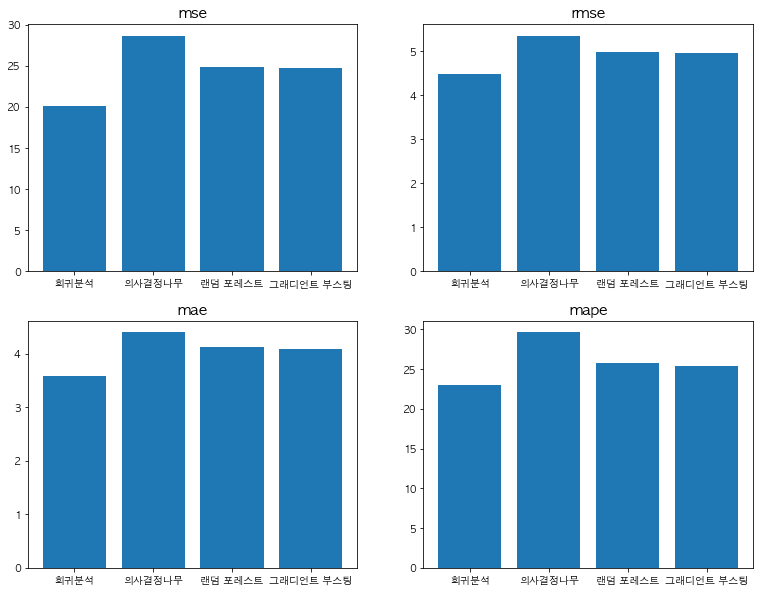

In [14]:
fig,ax = plt.subplots(2,2,figsize=(13,10))

ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)


ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)


ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)


ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)
